In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

Error: Session cannot generate requests

# Explore data

In [2]:
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
submission_df = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [3]:
train_df.info()
print("\n", "#"*20, "\n")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB

 #################### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


Labels distribution

<AxesSubplot:>

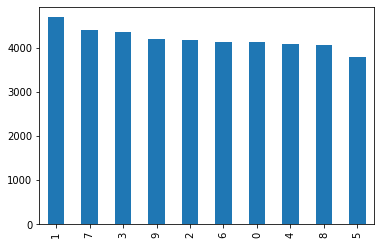

In [4]:
(train_df
 .label
 .value_counts()
 #.sort_values(ascending=True)
 .plot(kind="bar")
)


# NN

In [5]:
import tensorflow as tf
tf.__version__

'2.6.2'

### Build model

In [6]:
class digitModel():
    def __init__(self) -> None:
        pass
    
    def get(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape = 784), 
            tf.keras.layers.Dense(300, activation='relu'),
            tf.keras.layers.Dense(10, activation = 'softmax')
    ])
        model.compile(
            loss = 'sparse_categorical_crossentropy', 
            optimizer = 'adam', 
            metrics = ['accuracy'])
        
        return model

### Model summary

In [7]:
model = digitModel().get()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

### Train model

In [ ]:
# Split the train and the validation set for the fitting
train_y = train_df["label"]
train_x = (train_df.drop('label', axis=1))
X_train, X_val, Y_train, Y_val = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

Error: Session cannot generate requests

In [9]:
X_val.shape
# 1182

(4200, 784)

In [10]:
model.fit(X_train,y=Y_train, epochs=20)

### Predict test data

In [13]:
y_pred = np.argmax(model.predict(test_df), axis = -1)

# Submission

In [12]:
# submission_df['Label'] = y_pred
# submission_df.to_csv('my_submission', index = False)